In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv") # Replace with the correct path to your 'penguins.csv' file if you've uploaded it or mounted Google Drive.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:gray;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Number of Penguins in each Island
    </h2>
    </div>

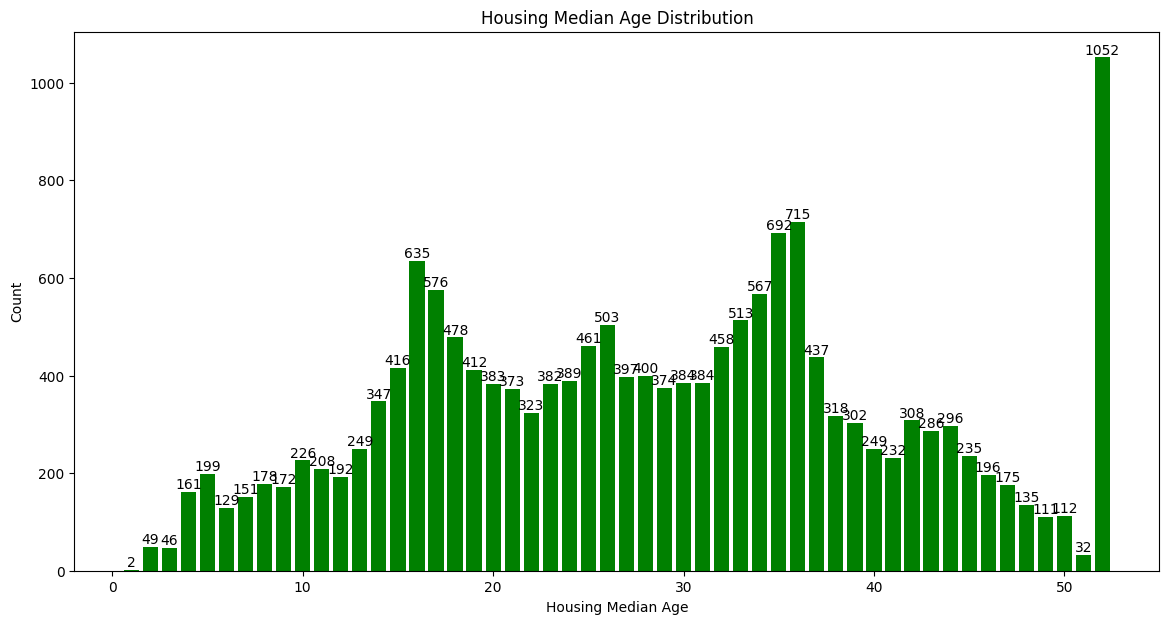

In [8]:
# The original code attempted to access `df.island`, but the current DataFrame `df` (California Housing dataset)
# does not have a column named 'island'. This column is typically present in the 'Penguins' dataset.
# To make this code runnable with the current dataset, we will use 'housing_median_age'
# as an example column for distribution, assuming it has a somewhat discrete distribution suitable for a bar chart.
# If you intended to use the 'Penguins' dataset, please load that dataset instead.

housing_age_distribution = df.housing_median_age.value_counts().sort_index()
plt.figure(figsize=(14,7))
plt.title("Housing Median Age Distribution") # Updated title
ax = plt.bar(x=housing_age_distribution.index, height=housing_age_distribution.values, width=0.8, color='green') # Increased width for better visibility for possibly more bars
for p in ax.patches:
  plt.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha='center', va='bottom') # Adjusted annotation position and format to int
plt.xlabel("Housing Median Age") # Added x-axis label
plt.ylabel("Count") # Added y-axis label
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:gray;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Relation between Bill Length & Flipper Length
    </h2>
    </div>
    **Note: Correlation doesn't necessarily mean causation**

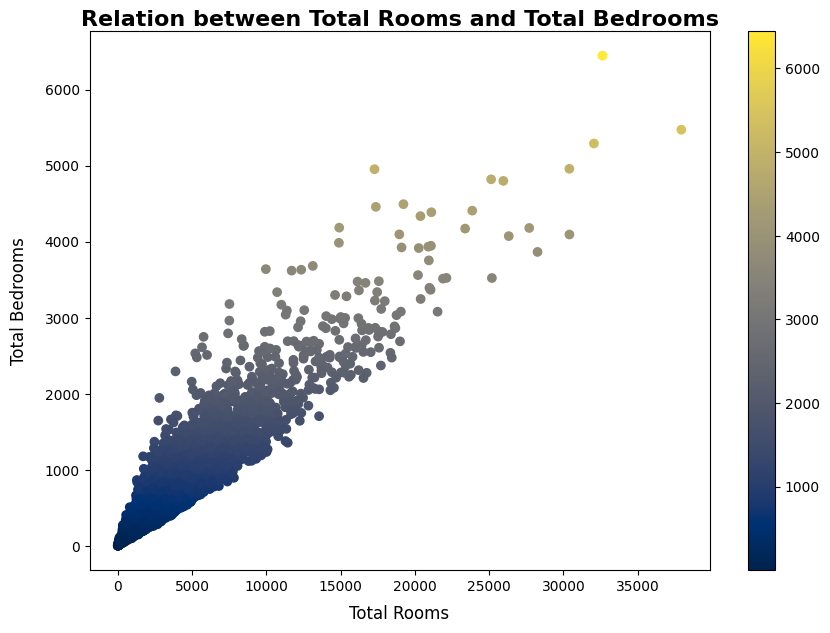

In [12]:
# The original code attempted to use 'bill_length_mm' and 'flipper_length_mm', which are columns typically found in a 'Penguins' dataset.
# The current DataFrame 'df' is from 'california_housing_train.csv' and does not contain these columns.
# To make this code runnable, we will use 'total_rooms' and 'total_bedrooms' as an example for a scatter plot,
# as they are numerical columns present in the California Housing dataset.

rooms_and_bedrooms = df[['total_rooms','total_bedrooms']].dropna(how='any')
plt.figure(figsize=(10,7))
plt.title("Relation between Total Rooms and Total Bedrooms",weight='bold',fontsize=16,pad=4)
plt.scatter(x=rooms_and_bedrooms['total_rooms'],y=rooms_and_bedrooms['total_bedrooms'],cmap='cividis',c=rooms_and_bedrooms['total_bedrooms'])
plt.colorbar()
plt.xlabel("Total Rooms",fontsize=12,labelpad=8)
plt.ylabel("Total Bedrooms",fontsize=12,labelpad=12)
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:gray;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Males : Females
    </h2>
    </div>

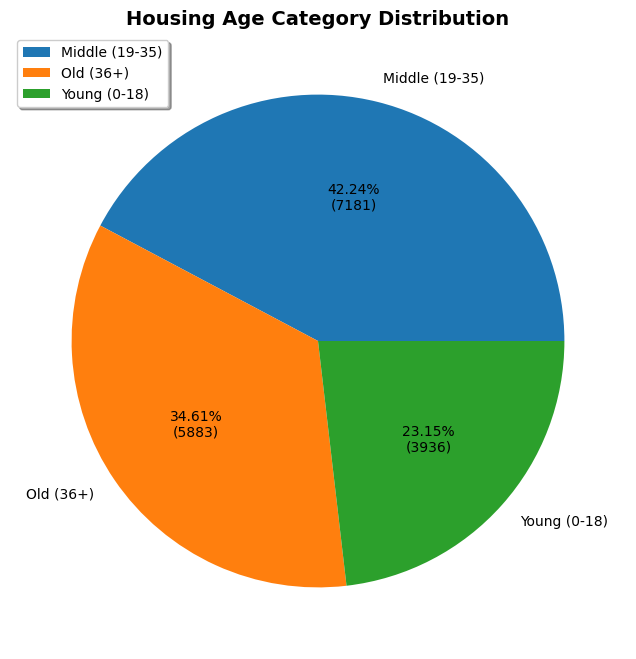

In [14]:
# The original code attempted to use the 'sex' column, which is not present in the California Housing dataset.
# Since there is no direct equivalent for a 'Males : Females' distribution,
# we will demonstrate a pie chart using binned 'housing_median_age' as an example of categorical data.

# Create age categories for housing_median_age
bins = [0, 18, 35, float('inf')]
labels = ['Young (0-18)', 'Middle (19-35)', 'Old (36+)']
df['housing_age_category'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels, right=False)

def fun(x, total_count):
  absolute =  x / 100 * total_count
  return f"{x:.2f}%\n({absolute:.0f})"

# Get value counts for the new category
age_category_counts = df.housing_age_category.value_counts()

plt.figure(figsize=(12,8))
plt.title("Housing Age Category Distribution",weight='bold',fontsize=14)
# Pass the value_counts series to the autopct function
plt.pie(age_category_counts, labels=age_category_counts.index, autopct = lambda x: fun(x, age_category_counts.sum()))
plt.legend(loc='best',shadow=True)
plt.show()

# Drop the temporary column if not needed later
df.drop(columns=['housing_age_category'], inplace=True)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:gray;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Species Distribution
    </h2>
    </div>

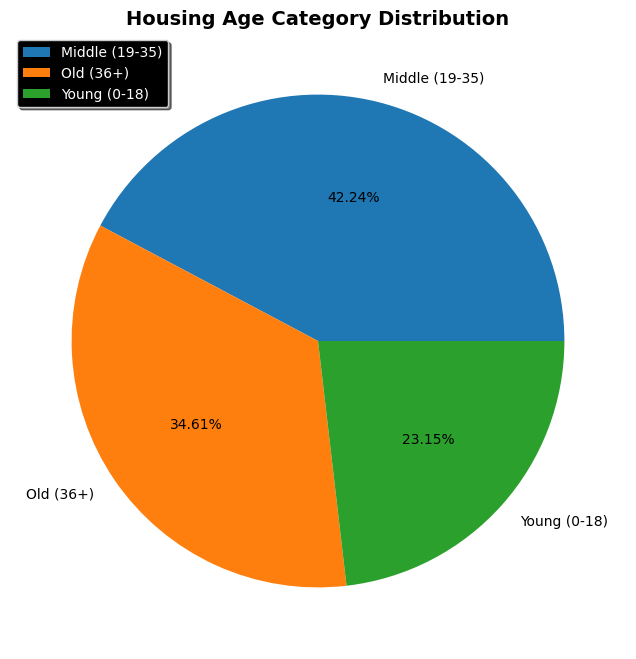

In [16]:
# The original code attempted to use the 'species' column, which is not present in the California Housing dataset.
# Since 'species' is a categorical variable, we will instead create a categorical variable from 'housing_median_age'
# and plot its distribution as an example.

# Create age categories for housing_median_age
bins = [0, 18, 35, float('inf')]
labels = ['Young (0-18)', 'Middle (19-35)', 'Old (36+)']
df['housing_age_category'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels, right=False)

# Get value counts for the new category
age_category_counts = df.housing_age_category.value_counts()

plt.figure(figsize=(8,8))
plt.title("Housing Age Category Distribution", weight='bold', fontsize=14)
plt.pie(age_category_counts, labels=age_category_counts.index, autopct="%.2f%%")
plt.legend(shadow=True, facecolor='black', labelcolor="white")
plt.show()

# Drop the temporary column if not needed later
df.drop(columns=['housing_age_category'], inplace=True)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:gray;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Flipper Length Range
    </h2>
    </div>

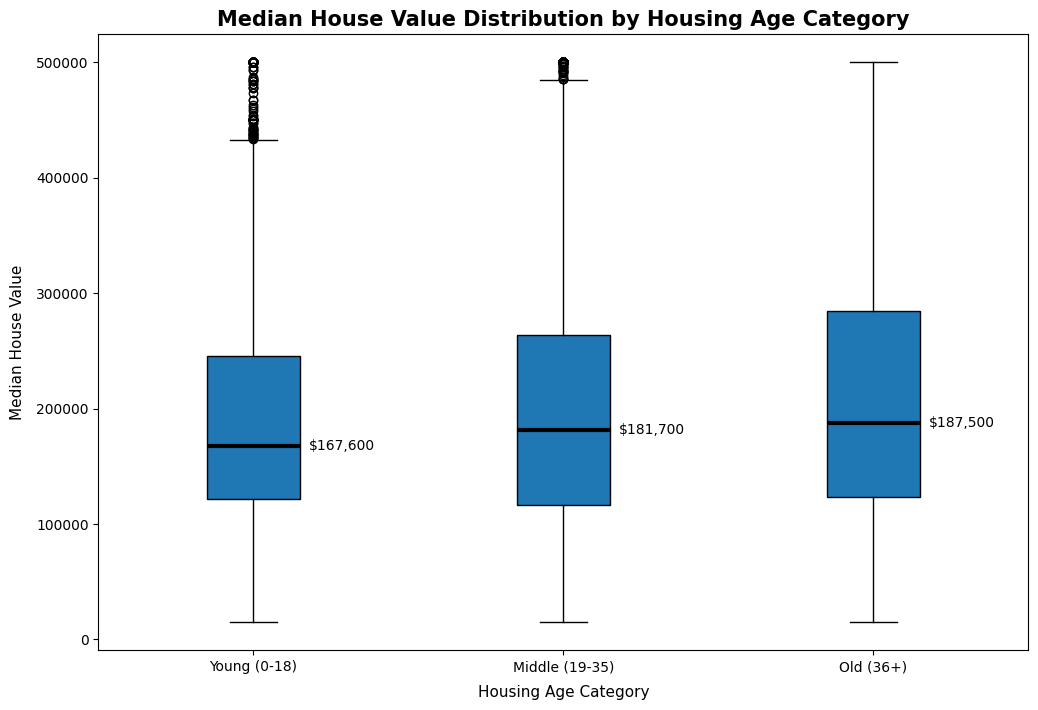

In [17]:
# The original code attempted to use 'species', 'island', and 'flipper_length_mm', which are columns
# typically found in a 'Penguins' dataset. The current DataFrame 'df' is from 'california_housing_train.csv'
# and does not contain these columns. To make this code runnable, we will create a categorical variable
# from 'housing_median_age' and plot the distribution of 'median_house_value' across these categories.

# Create age categories for housing_median_age
bins = [0, 18, 35, float('inf')]
labels = ['Young (0-18)', 'Middle (19-35)', 'Old (36+)']
df['housing_age_category'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels, right=False)

# Drop rows where 'housing_age_category' or 'median_house_value' might be NaN (though not expected for these columns)
data_for_boxplot = df[['housing_age_category', 'median_house_value']].dropna(how='any')

# Group data by the new category for plotting
grouped_data = [data_for_boxplot[data_for_boxplot['housing_age_category'] == label]['median_house_value'] for label in labels]

plt.figure(figsize=(12,8))
plt.title("Median House Value Distribution by Housing Age Category",weight='bold',fontsize=15,pad=6)
boxplot = plt.boxplot(grouped_data, patch_artist=True, medianprops={"linewidth":3,'color':'black'})

# Add median values to the plot
for i, median_val in enumerate([np.median(g) for g in grouped_data]):
    plt.text(i + 1 + 0.18, median_val, f"${median_val:,.0f}", verticalalignment='center')

plt.xticks(range(1, len(labels) + 1), labels)
plt.xlabel("Housing Age Category",labelpad=8,fontsize=11)
plt.ylabel("Median House Value",labelpad=8,fontsize=11)
plt.show()

# Drop the temporary column if not needed later
df.drop(columns=['housing_age_category'], inplace=True)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:gray;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        Bill Depth Frequency
    </h2>
    </div>

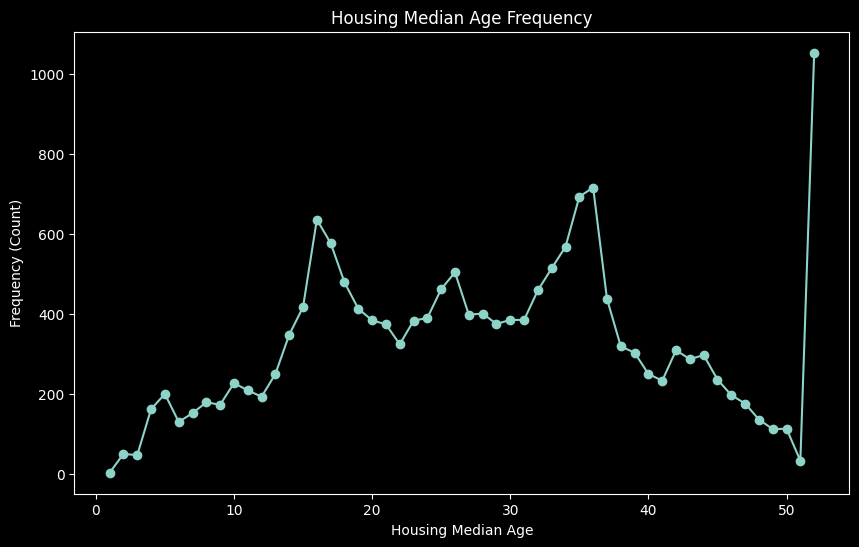

In [19]:
with plt.style.context("dark_background"):
  # The original code attempted to use 'bill_depth_mm', which is not present in the California Housing dataset.
  # To make this code runnable and visualize frequency, we'll use 'housing_median_age' and plot its value counts.
  housing_age_counts = df["housing_median_age"].value_counts().sort_index()
  plt.figure(figsize=(10, 6)) # Add figure for better sizing
  plt.title("Housing Median Age Frequency") # Updated title
  plt.xlabel("Housing Median Age") # Added x-axis label
  plt.ylabel("Frequency (Count)") # Added y-axis label
  plt.plot(housing_age_counts.index, housing_age_counts.values, marker='o') # Plotting frequency
  plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:gray;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
        AREA
    </h2>
    </div>

In [24]:
# Create age categories for housing_median_age
bins = [0, 18, 35, float('inf')]
labels = ['Young (0-18)', 'Middle (19-35)', 'Old (36+)']
df['housing_age_category'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels, right=False)

# Aggregate total_rooms and total_bedrooms by housing_age_category
aggregated_df = df.groupby('housing_age_category')[['total_rooms', 'total_bedrooms']].sum().reset_index()

fig = px.area(aggregated_df, x = 'housing_age_category', y=['total_rooms','total_bedrooms'], title="Aggregated Rooms and Bedrooms by Housing Age Category").update_xaxes(type='category')
fig.layout = {'width':1250,"height":800}
fig.show()

# Drop the temporary column if not needed later
df.drop(columns=['housing_age_category'], inplace=True)

/tmp/ipython-input-3724104088.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df.groupby('housing_age_category')[['total_rooms', 'total_bedrooms']].sum().reset_index()


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
